<a href="https://colab.research.google.com/github/raviakasapu/MachineLearning/blob/main/ML_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Single variable

In [79]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My\ Drive/Colab_files/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab_files


In [80]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore

In [81]:
salary_df = pd.read_csv('salary.csv')

In [82]:
salary_df.head(5)

,S No,Percentage,Salary
0,1,62,27000
1,2,76,20000
2,3,72,24000
3,4,60,25000
4,5,61,18000


In [83]:
salary_df.drop('S No', axis=1, inplace=True)

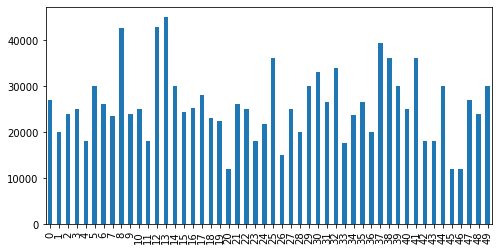

In [84]:
salary_df['Salary'].plot.bar(figsize=[8, 4])
plt.show()

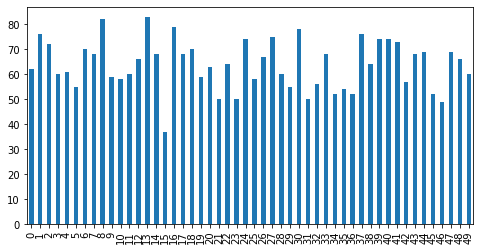

In [85]:
salary_df['Percentage'].plot.bar(figsize=[8, 4])
plt.show()

In [86]:
max(salary_df['Salary'])

45000

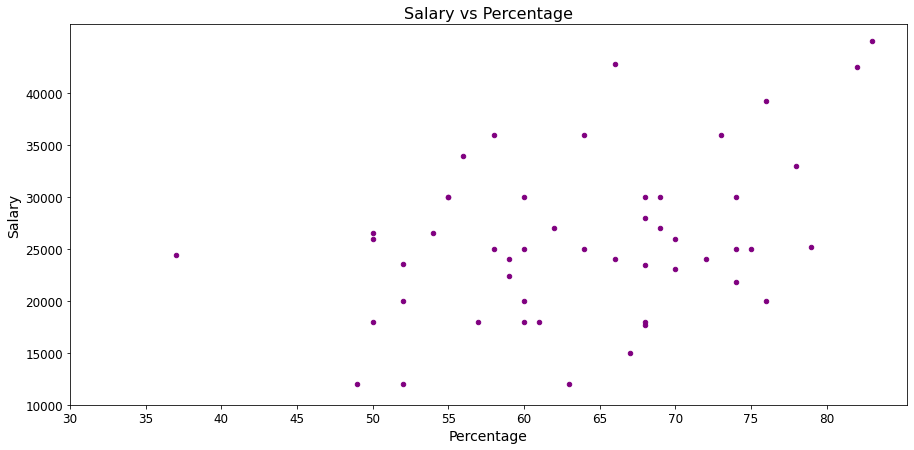

In [87]:
# Using magic of pandas scatter() function along with implicit figure size of 15 X 7 inches
salary_df.plot.scatter(x='Percentage', y='Salary', color='purple', figsize=[15, 7])

# Changing x-ticks ranging from 0 to 90 with step size of 5 and label size of 12
plt.yticks(ticks=np.arange(10000, max(salary_df['Salary']), 5000), size=12)

# Changing y-ticks ranging from 0 to 800 with step size of 50 and label size of 12
plt.xticks(ticks=np.arange(30, max(salary_df['Percentage']), 5), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Percentage', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Salary', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Salary vs Percentage', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

In [88]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Percentage  50 non-null     int64
 1   Salary      50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [89]:
salary_df.describe()

,Percentage,Salary
count,50.000000,50.000000
mean,63.800000,25826.000000
std,9.820844,7671.144182
min,37.000000,12000.000000
25%,57.250000,20450.000000
50%,64.000000,25000.000000
75%,70.000000,30000.000000
max,83.000000,45000.000000


In [90]:
X = sm.add_constant(salary_df['Percentage'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
X.head(5)

,const,Percentage
0,1.0,62
1,1.0,76
2,1.0,72
3,1.0,60
4,1.0,61


In [92]:
Y = salary_df['Salary']

In [93]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size =0.8, random_state = 100)

In [94]:
print(train_X.shape)
print(train_Y.shape)

(40, 2)
(40,)


In [95]:
salary_df_lm = sm.OLS(train_Y, train_X).fit()

In [96]:
print(salary_df_lm.params)

const         7908.461680
Percentage     290.496499
dtype: float64


In [97]:
print(salary_df_lm.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.139     
Dependent Variable: Salary           AIC:                823.4053  
Date:               2022-05-20 10:50 BIC:                826.7831  
No. Observations:   40               Log-Likelihood:     -409.70   
Df Model:           1                F-statistic:        7.313     
Df Residuals:       38               Prob (F-statistic): 0.0102    
R-squared:          0.161            Scale:              4.8572e+07
-------------------------------------------------------------------
              Coef.    Std.Err.   t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const       7908.4617 6965.5630 1.1354 0.2633 -6192.5835 22009.5068
Percentage   290.4965  107.4244 2.7042 0.0102    73.0272   507.9658
-------------------------------------------------------------------
Omnibus:                1.077        Durbin-Watson:           2.37

In [98]:
summary_table = salary_df_lm.summary2()

In [99]:
LRresult = (salary_df_lm.summary2().tables[1])

In [100]:
LRresult['P>|t|']['Percentage']>0.05

False

In [101]:
salary_df_lm_residual = salary_df_lm.resid

<Figure size 576x432 with 0 Axes>

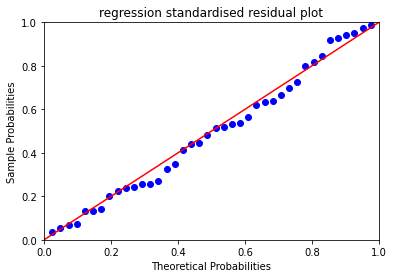

In [102]:
probplot = sm.ProbPlot(salary_df_lm_residual)
plt.figure(figsize=(8,6))

probplot.ppplot(line='45')
plt.title("regression standardised residual plot")

plt.show()

In [103]:
def get_standardized_vals(vals):
  return ((vals-vals.mean())/vals.std())

In [104]:
fit_vals = get_standardized_vals(salary_df_lm.fittedvalues)
stad_vals = get_standardized_vals(salary_df_lm_residual)

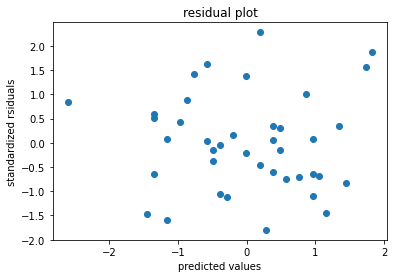

In [105]:
plt.scatter(fit_vals, stad_vals)
plt.title("residual plot")

plt.xlabel("predicted values")
plt.ylabel("standardized rsiduals")
plt.show()

In [106]:
salary_df['zscore_salary'] = zscore(salary_df['Salary'])

In [107]:
salary_df['zscore_salary'].head(5)

0    0.154595
1   -0.767180
2   -0.240452
3   -0.108769
4   -1.030544
Name: zscore_salary, dtype: float64

In [108]:
salary_df[(salary_df['zscore_salary']>3) | (salary_df['zscore_salary'] <-3)]

,Percentage,Salary,zscore_salary


In [109]:
salary_influence = salary_df_lm.get_influence()
(c,p) = salary_influence.cooks_distance

In [110]:
c,p

(array([3.29188702e-04, 1.69563086e-02, 9.75998761e-03, 8.37738240e-02,
        2.44313121e-02, 4.68486761e-02, 4.51158039e-02, 4.69284889e-03,
        3.58003073e-05, 5.43599331e-03, 3.07218394e-04, 1.41726947e-02,
        4.34694631e-02, 2.38257269e-03, 1.09018882e-02, 2.42350097e-01,
        6.84923322e-02, 1.72019964e-02, 6.95007626e-02, 1.35882051e-02,
        1.07355535e-02, 6.09314326e-04, 1.86889574e-02, 3.73086983e-04,
        3.03607611e-02, 1.41863618e-03, 2.67055105e-03, 9.80976537e-02,
        1.71488124e-03, 2.35750789e-02, 1.04293748e-02, 2.36906425e-04,
        5.04489978e-03, 2.18393947e-05, 1.04934172e-01, 1.68429018e-02,
        1.95718030e-04, 3.60268109e-05, 3.19973673e-02, 1.50626926e-01]),
 array([0.99967087, 0.98319408, 0.99028997, 0.9198086 , 0.97588003,
        0.95428681, 0.9559379 , 0.99531872, 0.9999642 , 0.99457953,
        0.99969283, 0.98593247, 0.95750933, 0.99762041, 0.98916041,
        0.78598506, 0.93391563, 0.98295276, 0.93297772, 0.98650849,
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'cooks distance')

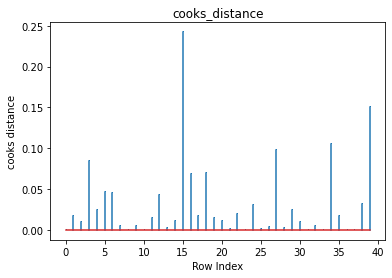

In [112]:
plt.stem(np.arange(len(train_X)), np.round(c,3), markerfmt=",")
plt.title("cooks_distance")

plt.xlabel("Row Index")
plt.ylabel("cooks distance")

In [115]:
from statsmodels.graphics.regressionplots import influence_plot

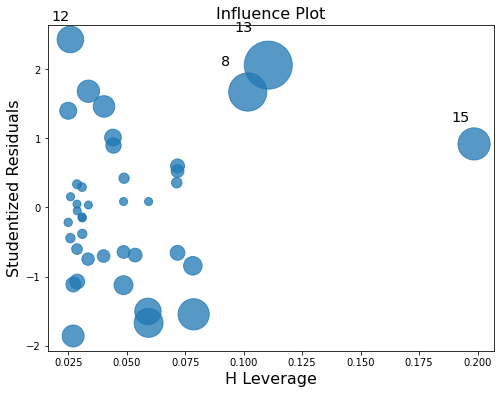

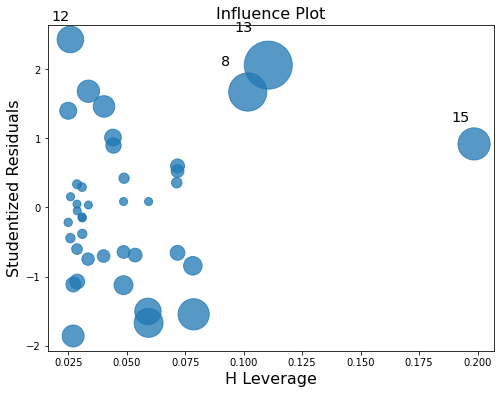

In [121]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
influence_plot(salary_df_lm, ax=ax)

In [124]:
pred_y = salary_df_lm.predict(test_X)
pred_y.shape

(10,)

In [126]:
from sklearn.metrics import r2_score, mean_squared_error


In [127]:
np.abs(r2_score(test_Y, pred_y))

0.05958777636306367

In [128]:
np.sqrt(mean_squared_error(test_Y,pred_y))

7904.541226192519